
# Project: Investigate a Dataset - [No Show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The noshow appointment dataset contains information of many appointments. The dataset was originally sourced from Kaggle. This dataset is focused on the question of whether or not patients show up for their appointment and what factors were useful in predicting if patients would miss thier appointments. It contains basic demographic information on the patients as well as whether or not the patient received SMS notifications.

 A number of characteristics about the patient are included in each row.
 
● PatientId:	Identification of a patient

● AppointmentID: Identification of each appointment

● Gender:	Male or Female.

● ScheduledDay:	The day someone called or registered the appointment.

● AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.

● Age:	How old is the patient.

● Neighbourhood:	Where the appointment takes place.

● Scholarship:	1 of 0 indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.

● Hipertension:	1 or 0

● Diabetes:	1 or 0

● Alcoholism:	1 or 0

● Handcap:	1 or 0

● SMS_received:	1 or 0 messages sent to the patient.

● No-show:	it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### Question(s) for Analysis

Using descriptive statistics the following questions should be answered: 

Q1: How many percent of patients missed their scheduled appointment?

Q2: What is the age distribution for who showed and didn't show up?

Q3: Which feature of gender, alcoholism, hypertension, diabetes, scholarship and smsreceived affects on missing appointments?

Q4: What is the gender distribution for show / missed appointment?

Q5: Is there a weekday that has higher rate of missed appointments?

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.4MB/s eta 0:00:01   16% |█████▎                          | 1.7MB 12.7MB/s eta 0:00:01    22% |███████▎                        | 2.4MB 13.2MB/s eta 0:00:01    46% |███████████████                 | 4.9MB 14.4MB/s eta 0:00:01    75% |████████████████████████        | 7.8MB 11.9MB/s eta 0:00:01    80% |█████████████████████████▊      | 8.4MB 12.1MB/s eta 0:00:01    91% |█████████████████████████████▏  | 9.5MB 12.2MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.2MB/s eta 0:00:01   13% |████▍                           | 1.8MB 16.4MB/s eta 0:00:01    23% |███████▍                        | 3.1MB 11.7MB/s eta 0:00:01    30% |█████████▉                      | 4.1MB 9.7MB/s eta 0:00:01    38% |████████████▍                   | 5.2MB 11.5MB/s eta 0:00:01    46% |██████████████▉                 | 6.2MB 12.0MB/s eta 0:00:01    50% |████████████████▏               | 6.8MB 12.2MB/s eta 0:00:01    54% |█████████████████▍       

<a id='wrangling'></a>
## Data Wrangling

This section is about assessing data and cleaning this dataset for analysis. The Pandas library will be used to work with the data. The following commands will low that dataset into a pandas dataframe and display basic information about it.

### General Properties

● Dataset shape

● Columns data types

● Missing values

● Unique id values

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Each row in noshowappointment dataset contains many columns like patient id , an appointment id, gender, age, scholership, scheduled day, appointment day, hypertension and others

In [4]:
#Use dataframe shape function to get number of rows and columns
df.shape

(110527, 14)

The ouput shows that there are 110527 record described by 14 columns. The following command will take close look at the data.

In [5]:
#Use dataframe describe function to take a closer look at the data 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Use info function to check missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values.


In [7]:
#Get the count of patients and appointments to discover which has unique values
df.loc[:, ['PatientId', 'AppointmentID']].nunique().to_frame('Count')

,Count
PatientId,62299
AppointmentID,110527


AppointmentId has the same count of 110527 entries of the dataset and AppointmentId has lower count. This indicatis the AppointmentId is not unique and one patient could have more than one appointment. Thus appointmentID is unique.

In [8]:
#Count of males and females
df["Gender"].value_counts().to_frame('Gender Count')

,Gender Count
F,71840
M,38687


Appointments made by female are more than the number of appointment made by males.

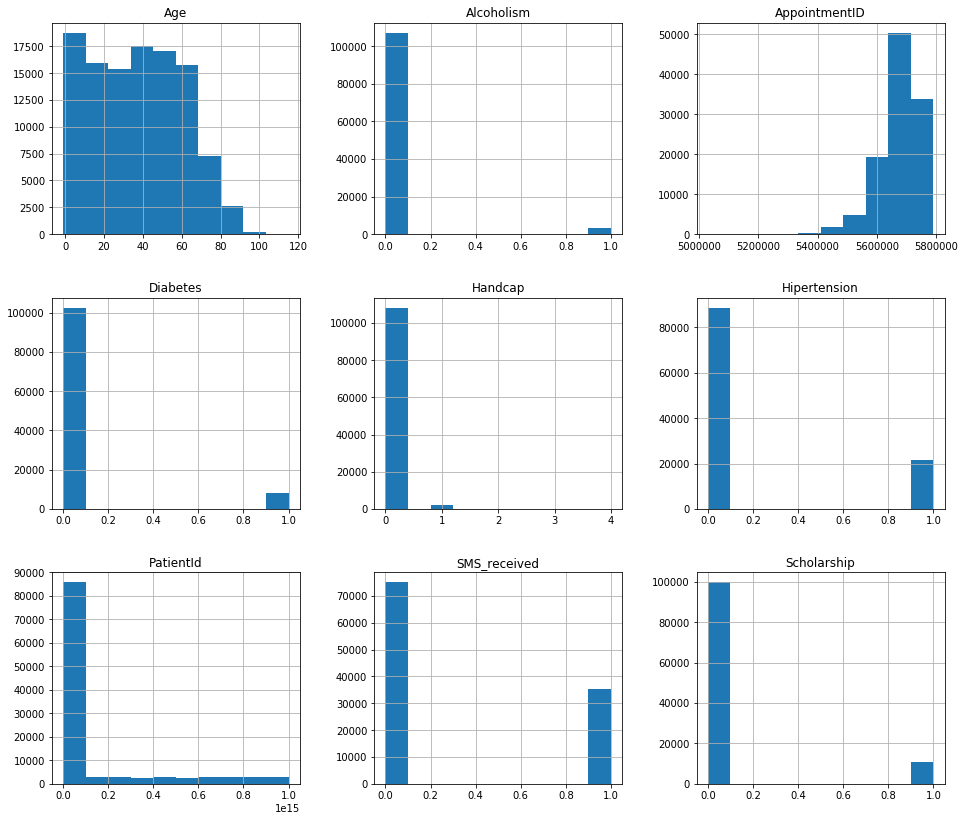

In [9]:
#Histogram for all datset fields
df.hist(figsize=(16,14));
plt.legend()
plt.show()

Most patients are not alcoholics, diabetes nor handicapted.

##### Observation in this dataset: 

● There are one dependent (no_show) and 13 independent variables.

● No missing values (NaNs) is found in the whole dataset.

● The patient_id data type is float but should be int.

● The scheduled_day and appointment_day columns type should be changed to datetime.

● Show and no-show appointments are distributed among days of week.

● It would be more convientent to convert no_show to show and changes its datatype to be 1 and 0 according to others variables in this dataset.


### Data Cleaning
 
After discussing the structure of the data and any problems that need to be cleaned. Performing those cleaning steps in this section by checking and fixing

● Duplicates

● Columns' label

● Columns' datatype

● Incorrect values

and extracting inportant parts form values such as day from AppointmentDay.

In [10]:
#check duplicated records by using duplicated function
print("Duplicated rows : {}".format( df.duplicated().sum()))

Duplicated rows : 0


There are no duplicated rows.

In [11]:
#Change columns' labels to be lower case by using string lower function 
#Rename no-show to show by using string replace function and removing any dashes(_) from any label 
df.columns= df.columns.str.strip().str.replace('No-', '').str.replace('_', '').str.lower() 
df.rename(columns = {'hipertension': 'hypertension', 'handcap': 'handicap'}, inplace = True)
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'smsreceived', 'show'],
      dtype='object')

Labels of columns is converted to lowercase, the name of column of no-show is changed to show and two label spelling is corrected.

In [12]:
#Convert no_show to show by converting 'yes' value to 0 and 'no' to 1
df['show'] = df['show'].map({'Yes':0 ,'No':1})
df['show'].value_counts()

1    88208
0    22319
Name: show, dtype: int64

The changed show column has new values where old yes means 0 (didn't show) and old no means 1 (show-up) 

In [13]:
#change columns' datatype
#The patient_id data type is float but should be int
#change scheduledday & appointmentday to datetime
#change show from string to int 
df['patientid'] = df['patientid'].astype(int) 
df['scheduledday'] = pd.to_datetime(df['scheduledday'], errors='coerce') #datetime 
df['appointmentday'] = pd.to_datetime(df['appointmentday'], errors='coerce') #datetime
df['show'] = df['show'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null int64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null datetime64[ns]
appointmentday    110527 non-null datetime64[ns]
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hypertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handicap          110527 non-null int64
smsreceived       110527 non-null int64
show              110527 non-null int64
dtypes: datetime64[ns](2), int64(10), object(2)
memory usage: 11.8+ MB


Patientid column datatype is now integer, scheduled day and appointment day changed to datetime and show become integer containing the new values of 0 and 1.

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64


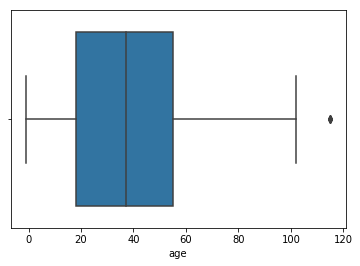

In [14]:
#check age values and expose the outliers in the age field that could potentially be errors. 
#Boxplots provide a way to visually identify outliers. 
print(df['age'].describe()) 
sns.boxplot(df['age'])
plt.show()

Youngest person is -1 and the oldest is 115.
The boxplot also illustrate the outliers at high end of the range and the values below zero are not showed.
There is a data range problem in the dataset. The age value cannot be below 0, and there are some very old people as well, to be investigated.

In [15]:
#check age values below 0 and above 110
df_filter_age=df.query('age <= 0 | age > 110')
df_filter_age['age'].value_counts().to_frame('Age count below 0 and above 100')

,Age count below 0 and above 100
0,3539
115,5
-1,1


 The following cells will explain removing records with age problem and changing age value of 0 to the mean value.

In [16]:
#drop age below 0 and above 100 
index_age = df.query('age < 0 | age > 110').index
df.drop(index_age , inplace=True)

#fill values of age 0 with mean 
mean_age = df['age'].mean()
df['age'] = df['age'].replace(to_replace=0 , value=mean_age)

Five records whose patients are above 110 years and only one patient record below 0 which are removed from this dataset. Patient with age 0 is replaced with the age average.

In [17]:
# Extract day from appointmentday to get the distribution of appointmenta
df['day'] = df['appointmentday'].dt.weekday_name
df['day'].value_counts().to_frame('Number of Appointments')

,Number of Appointments
Wednesday,25867
Tuesday,25640
Monday,22712
Friday,19018
Thursday,17245
Saturday,39


Monday to Friday appointments are almost equal and none on Sunday.There are a little less visits on Thursday and Friday.

##### Other Observations:

● No duplicated rows were found in this dataset.

● Age of patients are 37 years on average. 

● 25% of patients are below 18 and most of them are below 55 and the number of patients goes down for patients older than 60 years.

● The distribution of appointments among days of week Monday to Friday is almost equal with a little bit less visits on Thursday and Friday.


<a id='eda'></a>
## Exploratory Data Analysis

Based on dataset analysis, I will focus on putting more light on answers to the following questions:


### Why Patients Miss Appointments

### Research Question 1 (How many percent of patients missed their scheduled appointment?)

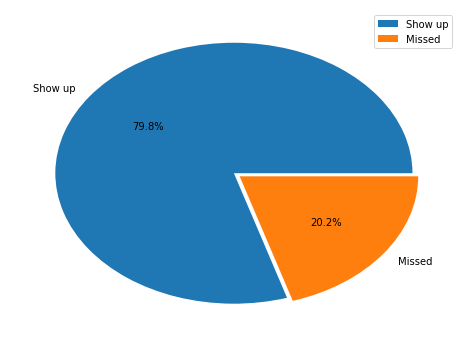

In [30]:
# calculate no-show appointment rate 
plt.figure(figsize=(8, 6))
plt.pie((df['show'].value_counts()), labels=['Show up', 'Missed'], autopct='%.1f%%', explode=(0, .04));
plt.legend()
plt.show()

The piechart shows that about 79.8% of patient who schedule an appointment did show up while 20.2% missed it.


### Research Question 2  (What is the age distribution for who showed and didn't show up?¶

Overall age mean: 38.27321750161431
 mean age for patient showed: 39.008055245760325
 mean age for patient missed: 35.368738059850564


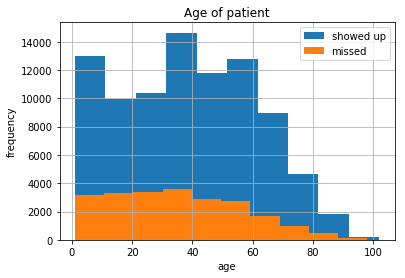

In [31]:
# explore age distrubtion of showup and missed appointment

#age distribution for who showd
age_show=df.query('show == 1').age
age_show.hist(label='showed up')

#age distribution for who missed
age_miss=df.query('show == 0').age
age_miss.hist(label='missed')

# mean for both distribution 
print('Overall age mean: {}\n mean age for patient showed: {}\n mean age for patient missed: {}'
      .format(df['age'].mean(), age_show.mean(), age_miss.mean()))

plt.xlabel("age")
plt.ylabel("frequency")
plt.title("Age of patient")
plt.legend()
plt.show()

Age is an important feature that indicates if a patient would show up or miss the appointment. Between 1-65 years old, the rate of no-shows seems to be higher. The average of age for patient who show up is around 39 which is higher than the average age of around 35 for patient who are likely to miss the appointment.


### Research Question 3 (Which feature of gender, alcoholism, hypertension, diabetes, scholarship and smsreceived affects on missing appointments?)

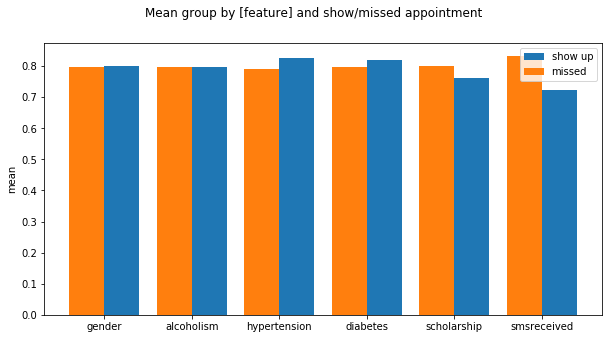

In [32]:
# six features selected from dataset to be grouped with show

#using subplots to display features together in one graph
fig, axs = plt.subplots()
fig.suptitle('Mean group by [feature] and show/missed appointment')
fig.set_figheight(5)
fig.set_figwidth(10)
width=0.4

#list of fields that should be investiaged for show/ miss appointment
features=['gender','alcoholism', 'hypertension','diabetes', 'scholarship' , 'smsreceived']
inx = np.arange(len(features))

#loop to get the mean by grouping feature with show/miss
show=[]
noshow=[]
for i in features:
    feature_data=df.groupby(i)['show'].mean()
    # miss mean of each feature
    noshow.append(feature_data[0]) 
    # show mean of each feature
    show.append(feature_data[1])  

#plot calculated mean from grouping features with show/miss
axs.bar(inx  + width/2, show, width, label='show up')
axs.bar(inx - width/2, noshow, width, label='missed')

plt.xticks(inx, features)
plt.ylabel('mean')
plt.legend()
plt.show()

The barplot displays that features of gender with 80% and alcoholism with 80% for both showing or missing appointments. It is not a factor to decide if the patient would miss his appointment or not based on gender or alcoholism.

Patient with scholarship are most likely to miss thier appointments with 80%.

More than 70 percetage of patients received sms regarding an appointment but the average of missed appointment is much higher when SMS messages were received. 83% of missed appointments regarding SMS which is higher than any missed percentage of other features. SMS is not neccessary the right option to make sure that patient will show up. 

Features of diabetes and hypertension have a narrow effect in keeping patient appointments with around 82% more than missing them with around 80% .

### Research Question 4 (What is the gender distribution for show / missed appointment?)

In [33]:
#the following funcation is about calculating the ratio of missed appointment for male and female
def calc_gender_missedRatio():
    
    # count appointments of each gender
    female_app = len(df.loc[df['gender'] == "F"])
    male_app = len(df.loc[df['gender'] == "M"])

    #count missed appointments of each gender
    f = len(df.query('show == 0 and gender == "F"'))
    m = len(df.query('show == 0 and gender == "M"'))

    #calculate the ratio of missed appointment for each gender
    f_ratio = int(round(f/female_app*100))
    m_ratio = int(round(m/male_app*100))
    print('Total of {} female appointments and {} were missed with the ratio of {}%.'.format(female_app, f, f_ratio))
    print('Total of {} male appointments and {} were missed with the ratio of {}%.'.format(male_app, m, m_ratio))

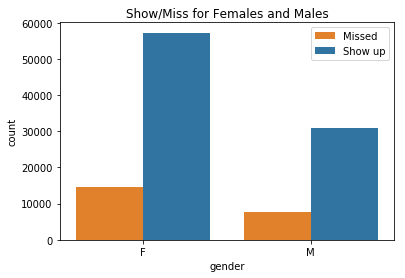

Total of 71834 female appointments and 14591 were missed with the ratio of 20%.
Total of 38687 male appointments and 7725 were missed with the ratio of 20%.


In [34]:
#plot each gender for show/miss appointment
ax = sns.countplot(x=df['gender'], hue=df['show'], data=df, palette=sns.color_palette(['tab:orange', 'tab:blue']))

ax.set_title("Show/Miss for Females and Males")
plt.legend(labels=['Missed', 'Show up'])
plt.show();

calc_gender_missedRatio()

### Research Question 5 (Is there a weekday that has higher rate of missed appointments?)

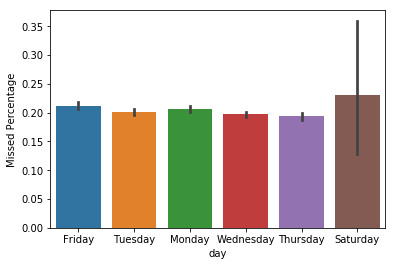

In [35]:
# use the extracted day from appointment day to visulize the distrubtion of missed appointments over weekdays
df['miss'] = (df.show == 0).astype(int)
sns.barplot(x=df['day'], y=df['miss']);
plt.ylabel('Missed Percentage')
plt.legend()
plt.show()

Higher percetage of missed appointments are on Saturdays and Fridays which are above 20%. Lower percentage below 20 are distribued Monday to Thursday.

<a id='conclusions'></a>
## Conclusions

The dataset is managed for unifying names, removing wrong data, adding new features based on existing data. A few observations is also managed regarding age and no_show fields.There are many patients with appointments scheduled and no duplicated rows were found in this dataset.

Most of the patient are at young age and on average are 37 years. 25% of patients are below 18 and most of them are below 55 and the number of patients goes down for patients older than 60 years.There was a small but significant difference in average age between patients who missed their appointments and those who show up. 

The distribution of appointments among days of week Monday to Friday is almost equal and none on Sunday.A little bit less visits on Thursday and Friday. Higher percetage of missed appointments are on Saturdays and Fridays which are above 20%.

The analysis identifies that several features were correlated with No Shows. The distributions of show/missed for different categories look similar and most of the patients are not alcoholics, diabetes nor handicapted. 
75% of patients recieved appointment SMS but the relationship between SMS received and no shows was contrary to what was expected. 

The data should be investigated for future researches with more statistical analysis to reveal new insights and correlations. For example, analyzing how much time passed between a visit scheduling time and the actual visit time could help on investigating the longest wait time and how it is related to no show rate. In addition, the appointment_day has no hour specified, thus it is difficult to analyze if the appointment hour has anything to do with no shows. Another example, the demographics such as neighbourhood could have a huge impact of patients missing their appointment. 


## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0